In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Blez cherian\Downloads\cirrhosis.csv")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
df.shape

(418, 20)

In [4]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [6]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
df["Bilirubin"].fillna(df["Bilirubin"].mean(), inplace=True)
df["Albumin"].fillna(df["Albumin"].median(), inplace=True)


In [8]:
df["Status"].fillna(df["Status"].mode()[0], inplace=True)
df["Drug"].fillna(df["Drug"].mode()[0], inplace=True)


In [9]:
df["Ascites"].fillna("N", inplace=True)
df["Edema"].fillna("N", inplace=True)


In [10]:
df["Copper"].fillna(0, inplace=True)  # Replace with 0 if missing means absence


In [11]:
df.fillna(method="ffill", inplace=True)  # Forward fill
df.fillna(method="bfill", inplace=True)  # Backward fill


In [12]:
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [15]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,18533.351675,3.220813,421.212919,3.497440,72.418660,2016.216746,125.965502,129.897129,255.483254,10.728469,3.028708
std,120.810458,1104.672992,3815.845055,4.407506,218.398169,0.424972,85.222515,1849.336509,49.314570,55.798124,97.825425,1.020781,0.883713
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,0.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,263.000000,3.242500,0.000000,1016.250000,91.000000,91.000000,185.750000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,360.500000,3.530000,50.500000,1717.000000,136.000000,133.000000,248.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,576.000000,3.770000,100.750000,2115.000000,136.000000,149.000000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


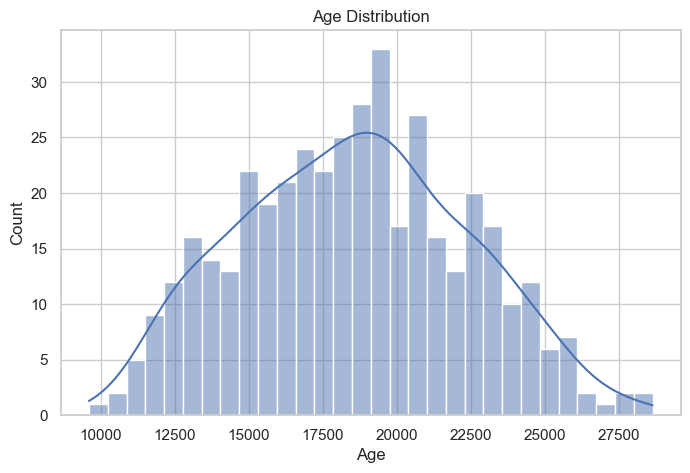

In [16]:


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


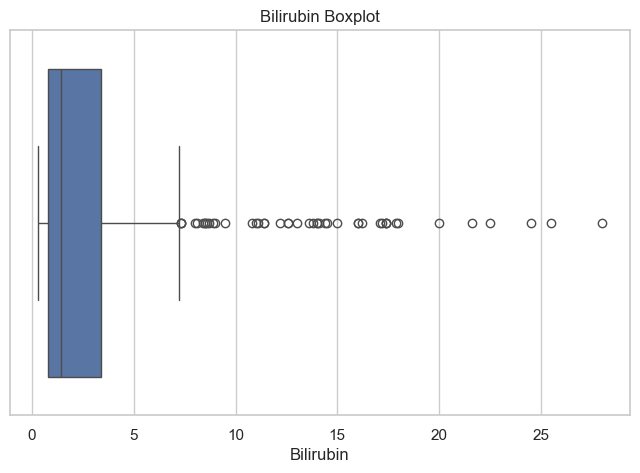

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Bilirubin"])
plt.title("Bilirubin Boxplot")
plt.show()


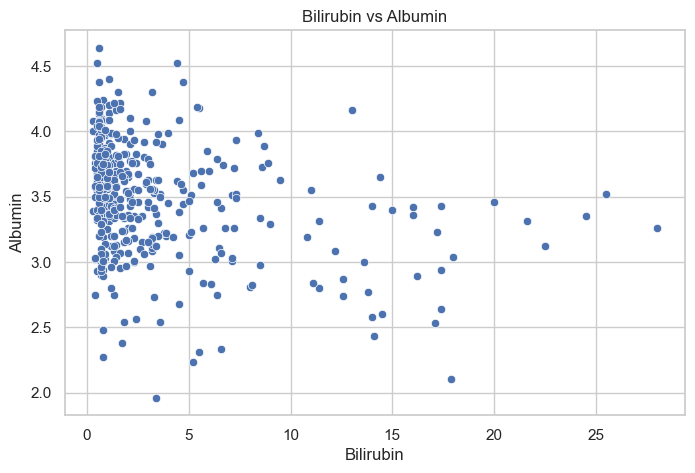

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Bilirubin"], y=df["Albumin"])
plt.title("Bilirubin vs Albumin")
plt.show()


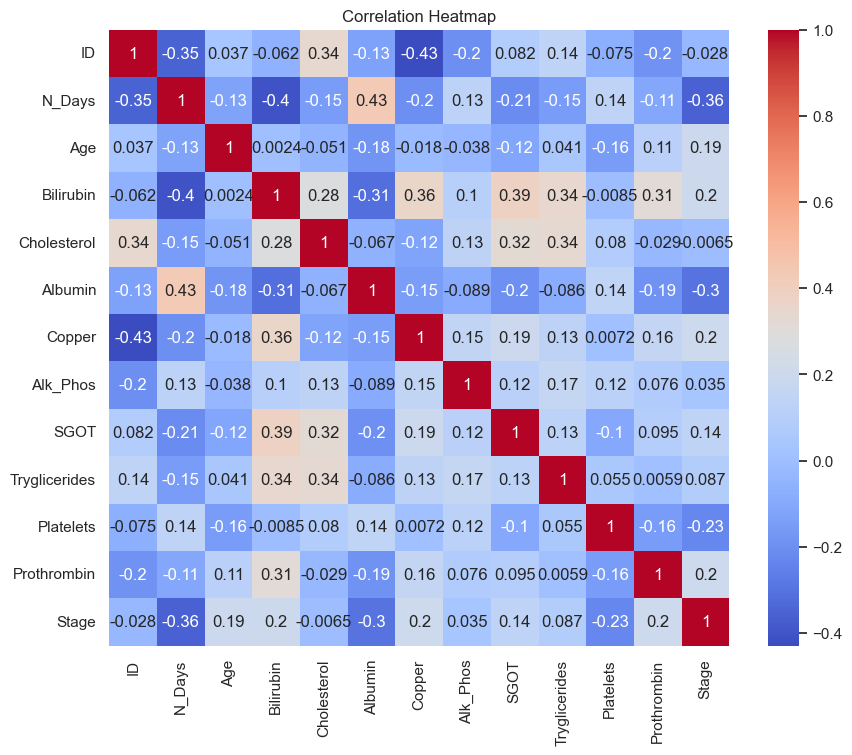

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


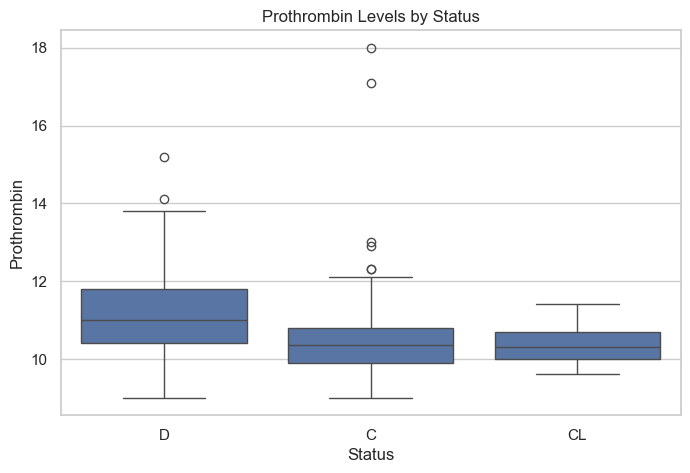

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Status"], y=df["Prothrombin"])
plt.title("Prothrombin Levels by Status")
plt.show()


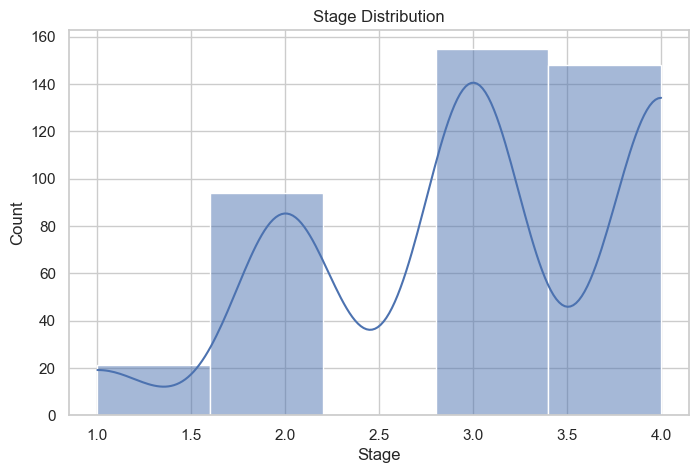

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Stage"].dropna(), bins=5, kde=True)
plt.title("Stage Distribution")
plt.show()


In [22]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()

In [23]:
df['Status']=le1.fit_transform(df['Status'])
df['Drug']=le2.fit_transform(df['Drug'])
df['Sex']=le3.fit_transform(df['Sex'])
df['Ascites']=le4.fit_transform(df['Ascites'])
df['Hepatomegaly']=le5.fit_transform(df['Hepatomegaly'])
df['Spiders']=le6.fit_transform(df['Spiders'])
df['Edema']=le7.fit_transform(df['Edema'])

In [24]:
x=df.drop(['Status'],axis=1)
x

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,0,24472,0,0,0,1,0,1.2,576.0,2.96,0.0,2115.0,136.00,149.0,174.0,10.9,3.0
414,415,1103,0,14245,0,0,0,1,0,0.9,576.0,3.83,0.0,2115.0,136.00,149.0,180.0,11.2,4.0
415,416,1055,0,20819,0,0,0,1,0,1.6,576.0,3.42,0.0,2115.0,136.00,149.0,143.0,9.9,3.0
416,417,691,0,21185,0,0,0,1,0,0.8,576.0,3.75,0.0,2115.0,136.00,149.0,269.0,10.4,3.0


In [25]:
y=df['Status']
y

0      2
1      0
2      2
3      2
4      1
      ..
413    2
414    0
415    0
416    0
417    0
Name: Status, Length: 418, dtype: int32

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

ytrain_pred = logreg.predict(xtrain)
ytest_pred = logreg.predict(xtest)

train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("Logistic Regression - Train Accuracy:", train_accuracy)
print("Logistic Regression - Test Accuracy:", test_accuracy)


Logistic Regression - Train Accuracy: 0.8356164383561644
Logistic Regression - Test Accuracy: 0.8015873015873016


Decision Tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

ytrain_pred = dt.predict(xtrain)
ytest_pred = dt.predict(xtest)

train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("Decision Tree - Train Accuracy:", train_accuracy)
print("Decision Tree - Test Accuracy:", test_accuracy)


Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.746031746031746


Random forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("Random Forest - Train Accuracy:", train_accuracy)
print("Random Forest - Test Accuracy:", test_accuracy)


Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.8015873015873016


Support vector Classifier

In [31]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(xtrain, ytrain)

ytrain_pred = svm.predict(xtrain)
ytest_pred = svm.predict(xtest)

train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("SVM - Train Accuracy:", train_accuracy)
print("SVM - Test Accuracy:", test_accuracy)


SVM - Train Accuracy: 0.8938356164383562
SVM - Test Accuracy: 0.8015873015873016


KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

ytrain_pred = knn.predict(xtrain)
ytest_pred = knn.predict(xtest)

train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("KNN - Train Accuracy:", train_accuracy)
print("KNN - Test Accuracy:", test_accuracy)


KNN - Train Accuracy: 0.7945205479452054
KNN - Test Accuracy: 0.753968253968254


Gradient Boost Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Fine-tuned Gradient Boosting with reduced overfitting
gb = GradientBoostingClassifier(
    n_estimators=150,      # Reduce trees (less complexity)
    learning_rate=0.03,    # Lower learning rate (better generalization)
    max_depth=3,           # Reduce depth to avoid overfitting
    min_samples_split=5,   # Minimum samples required to split
    min_samples_leaf=3,    # Minimum samples required in a leaf node
    subsample=0.75,        # Uses 75% of data per tree (randomness)
    random_state=42
)

# Train the model
gb.fit(xtrain, ytrain)

# Predictions
ytrain_pred = gb.predict(xtrain)
ytest_pred = gb.predict(xtest)

# Accuracy scores
train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)

print("Tuned Gradient Boosting - Train Accuracy:", train_accuracy)
print("Tuned Gradient Boosting - Test Accuracy:", test_accuracy)


Tuned Gradient Boosting - Train Accuracy: 0.9897260273972602
Tuned Gradient Boosting - Test Accuracy: 0.8412698412698413


In [ ]:
# Function to collect user input
def get_user_input():
    input_values = []
    print("\nEnter values for the following features (in the same order as training data):")
    
    # Collect input for each feature
    for i in range(xtrain.shape[1]):  # Iterate over feature count
        while True:
            try:
                value = float(input(f"Enter value for feature {i+1}: "))
                input_values.append(value)
                break
            except ValueError:
                print("Invalid input! Please enter a numeric value.")

    # Convert list to NumPy array and reshape for prediction
    user_data = np.array(input_values).reshape(1, -1)
    return user_data

# Collect user input
user_input = get_user_input()

# Make a prediction using the Gradient Boosting model
prediction = gb.predict(user_input)
print("\nPredicted class:", prediction[0])



Enter values for the following features (in the same order as training data):


Enter value for feature 1:  2
Enter value for feature 2:  4500
Enter value for feature 3:  0
Enter value for feature 4:  20617
Enter value for feature 5:  0
Enter value for feature 6:  0
Enter value for feature 7:  1
Enter value for feature 8:  1
Enter value for feature 9:  0
Enter value for feature 10:  1.1
Enter value for feature 11:  302.0
Enter value for feature 12:  4.14
Enter value for feature 13:  54.0
Enter value for feature 14:  7394.8
Enter value for feature 15:  113.52
Enter value for feature 16:  88.0
Enter value for feature 17:  221.0


In [36]:
df=pd.DataFrame({'test accuracy':[80,69,80,80,75,84],"train accuracy":[83,100,100,89,79,98]},index=["Logistic Regression","DecisionTree Classifier","Randomforest classifier","support vector classifier","KNN classifier","Gragientboost regressor"])
df

,test accuracy,train accuracy
Logistic Regression,80,83
DecisionTree Classifier,69,100
Randomforest classifier,80,100
support vector classifier,80,89
KNN classifier,75,79
Gragientboost regressor,84,98


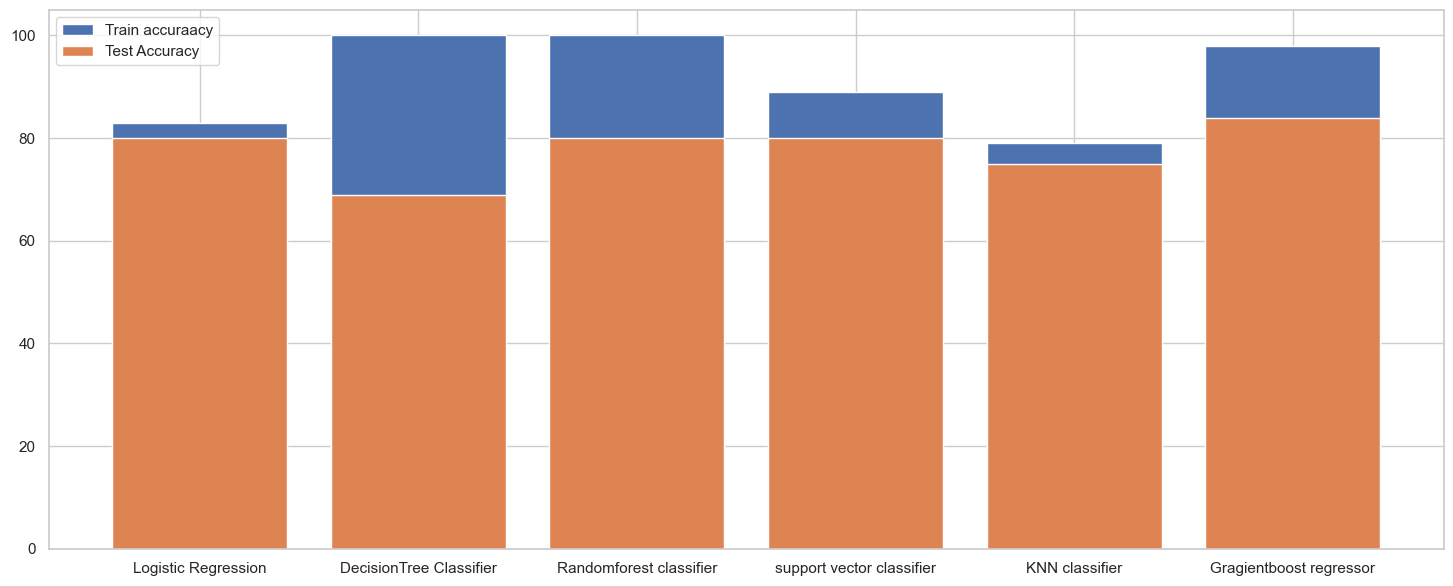

In [37]:
plt.figure(figsize=(18,7))
plt.bar(df.index,df["train accuracy"],label="Train accuraacy")
plt.bar(df.index,df["test accuracy"],label="Test Accuracy")
plt.legend()
plt.show()